<a href="https://colab.research.google.com/github/BinBinToure/Python/blob/main/_01_b_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

평균, 중간값, 사분위값, 최빈값, 분산, 표준편차, 공분산, 상관계수

In [ ]:
import numpy as np

In [ ]:
heights = np.random.normal(161.4,4,200) #평균 161.4, 표준편차 4, 표본 200 개 생성
print(heights)
bmis = np.random.normal(21,2,200) #평균 21, 표준편차 2, 표본 200개 생성
weights = bmis *(heights**2)/10000 #키와 bmi지수를 이용하여 몸무게 200개 생성

In [ ]:
print("===키===")
print("평균     :",heights.mean())
print("중간값   :",np.median(heights))
print("1/4분위값:",np.quantile(heights,0.25))
print("2/4분위값:",np.quantile(heights,0.5))
print("3/4분위값:",np.quantile(heights,0.75))
bins=[x/2 for x in range(145*2,180*2,5)]
hist,_ = np.histogram(heights,bins=bins)
print(hist)
print(bins)
astart = hist.argmax()
aend = astart+1
print(f"최빈 구간:{bins[astart]}~{bins[aend]} , 개수:{hist.max()}")
print("분산    :",np.var(heights))
print("표준편차:",np.std(heights))

===키===
평균     : 161.51014469378254
중간값   : 161.5230933444859
1/4분위값: 158.23383741326
2/4분위값: 161.5230933444859
3/4분위값: 164.5395473758021
[ 0  0  2 12 25 39 41 36 27 10  5  2  1]
[145.0, 147.5, 150.0, 152.5, 155.0, 157.5, 160.0, 162.5, 165.0, 167.5, 170.0, 172.5, 175.0, 177.5]
최빈 구간:160.0~162.5 , 개수:41
분산    : 20.27631977832293
표준편차: 4.50292347018278


In [ ]:
print("{0:05x} {1} {2}".format(12,34,55))
a=12
b=34
c=55
print(f"{a:05x} {b} {c}")

0000c 34 55
0000c 34 55


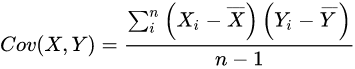

In [ ]:
cv = np.cov(heights,weights)
print("공분산(키    ,키    ):",cv[0,0])
print("공분산(키    ,몸무게):",cv[0,1])
print("공분산(몸무게,키    ):",cv[1,0])
print("공분산(몸무게,몸무게):",cv[1,1])

공분산(키    ,키    ): 20.378210832485355
공분산(키    ,몸무게): 14.920479303199498
공분산(몸무게,키    ): 14.920479303199498
공분산(몸무게,몸무게): 39.0855877988741


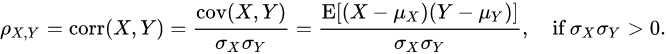

In [ ]:
std_h = heights.std()
std_w = weights.std()
print("상관계수(키,몸무게):",np.cov(heights,weights)[0,1]/(std_h*std_w))

상관계수(키,몸무게): 0.5313349019366815


In [ ]:
def correl(x,y):
  std_x = x.std()
  std_y = y.std()
  if std_x>0 and std_y>0:
    return np.cov(x,y)[0,1]/(std_x*std_y)

In [ ]:
print("상관계수(키,몸무게):",correl(heights,weights))

상관계수(키,몸무게): 0.5313349019366815


# 확률과 통계

독립사건, 정규 분포, 중심극한정리

In [ ]:
#P(A):사건 A가 발생할 확률
#P(B):사건 B가 발생할 확률
#P(A|B):사건 B가 발생한 상태에서 사건 A가 발생할 확률
#P(A and B):사건 A와 사건 B가 모두 발생할 확률
#만약 사건 A와 사건 B가 서로 영향을 주지 않으면 독립 사건이라 한다.
#P(A|B) = P(A) 일 때 사건 A와 사건 B는 독립 사건이다.
#A와 B가 독립 사건일 때 P(A and B) = P(A)*P(B) 공식이 성립한다.

In [ ]:
import math

In [ ]:
pa = 1/2 #동전을 던져서 앞면이 나올 확률
pb = 1/6 #주사위를 던져서 1면이 나올 확률
pab = pa*pb
print(pab)
logit_pab = math.log(pa) + math.log(pb)
inv_logit_pab = math.exp(logit_pab)
print(inv_logit_pab)

0.08333333333333333
0.08333333333333333


In [ ]:
#균등분포: 사건이 발생할 확률이 모두 같게 분포
def uniform_pdf(x,min_v=0,max_v=1):
  if(min_v<=x<=max_v):
    return 1/(max_v-min_v+1)
  return 0

In [ ]:
print(uniform_pdf(1,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 1이 나올 확률
print(uniform_pdf(2,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 2이 나올 확률
print(uniform_pdf(3,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 3이 나올 확률
print(uniform_pdf(4,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 4이 나올 확률
print(uniform_pdf(5,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 5이 나올 확률
print(uniform_pdf(6,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 6이 나올 확률

0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666


In [ ]:
#누적균등분포: 균등분포에서 누적값
def uniform_cdf(x,min_v=0,max_v=1):
  if x<min_v:
    return 0
  if min_v<=x<=max_v:
    return (x-min_v+1)/(max_v-min_v+1)
  return 1

In [ ]:
print(uniform_cdf(1,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 1이 이하가 나올 확률
print(uniform_cdf(2,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 2이 이하가 나올 확률
print(uniform_cdf(3,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 3이 이하가 나올 확률
print(uniform_cdf(4,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 4이 이하가 나올 확률
print(uniform_cdf(5,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 5이 이하가 나올 확률
print(uniform_cdf(6,1,6))#1에서 6사이의 수로 구성한 균등 분포에서 6이 이하가 나올 확률

0.16666666666666666
0.3333333333333333
0.5
0.6666666666666666
0.8333333333333334
1.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
xs =[x for x in range(-10,10)]
pys = [uniform_pdf(x,1,6) for x in xs]
cys = [uniform_cdf(x,1,6) for x in xs]
print(xs)
print(pys)
print(cys)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333334, 1.0, 1, 1, 1]


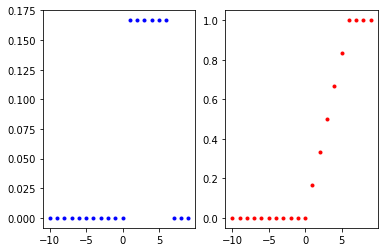

In [ ]:
fig,ax = plt.subplots(1,2) #1X2도면을 만들어 주세요.
ax[0].plot(xs,pys,"b.",label="pdf")
ax[1].plot(xs,cys,"r.",label='cdf')
plt.show()

정규분포

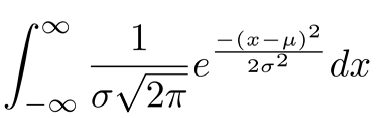

In [ ]:
#정규분포함수
def normal_pdf(x,mu=0,sigma=1): 
  pre = 1/(sigma*math.sqrt(2*math.pi))
  post = math.exp(-((x-mu)**2)/(2*(sigma**2)))
  return pre*post

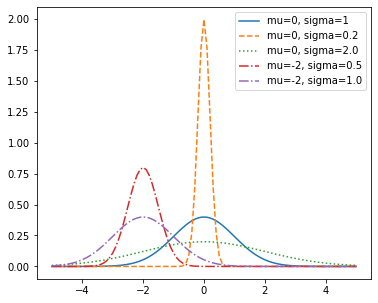

In [ ]:
xs = [x/10.0 for x in range(-50,51)]
ys1 = [normal_pdf(x) for x in xs]
ys2 = [normal_pdf(x,sigma=0.2) for x in xs]
ys3 = [normal_pdf(x,sigma=2.0) for x in xs]
ys4 = [normal_pdf(x,mu=-2,sigma=0.5) for x in xs]
ys5 = [normal_pdf(x,mu=-2,sigma=1.0) for x in xs]
plt.figure(figsize=(6,5))
plt.plot(xs,ys1,'-',label='mu=0, sigma=1')
plt.plot(xs,ys2,'--',label='mu=0, sigma=0.2')
plt.plot(xs,ys3,':',label='mu=0, sigma=2.0')
plt.plot(xs,ys4,'-.',label='mu=-2, sigma=0.5')
plt.plot(xs,ys5,'-.',label='mu=-2, sigma=1.0')
plt.legend()
plt.show()

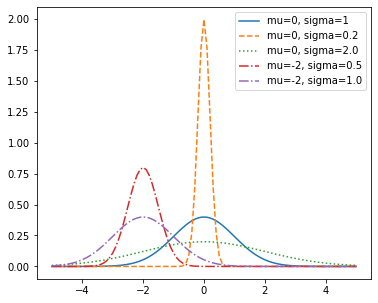

In [ ]:
import scipy.stats as st
xs = [x/10.0 for x in range(-50,51)]
ys1 = [st.norm.pdf(x) for x in xs]
ys2 = [st.norm.pdf(x,scale=0.2) for x in xs]
ys3 = [st.norm.pdf(x,scale=2.0) for x in xs]
ys4 = [st.norm.pdf(x,loc=-2,scale=0.5) for x in xs]
ys5 = [st.norm.pdf(x,loc=-2,scale=1.0) for x in xs]
plt.figure(figsize=(6,5))
plt.plot(xs,ys1,'-',label='mu=0, sigma=1')
plt.plot(xs,ys2,'--',label='mu=0, sigma=0.2')
plt.plot(xs,ys3,':',label='mu=0, sigma=2.0')
plt.plot(xs,ys4,'-.',label='mu=-2, sigma=0.5')
plt.plot(xs,ys5,'-.',label='mu=-2, sigma=1.0')
plt.legend()
plt.show()

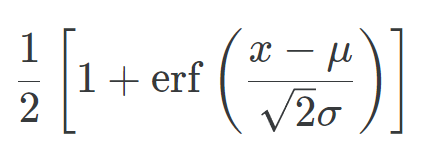

In [ ]:
def normal_cdf(x,mu=0,sigma=1):#정규누적분포
  return ( 1+(math.erf(   (x-mu) / (math.sqrt(2) * sigma)   )) )/2

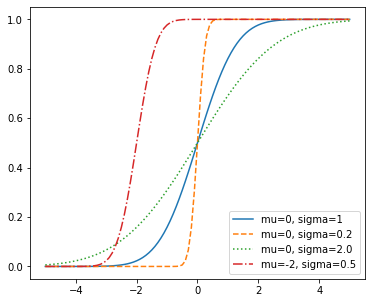

In [ ]:
xs = [x/10.0 for x in range(-50,51)]
ys1 = [normal_cdf(x) for x in xs]
ys2 = [normal_cdf(x,sigma=0.2) for x in xs]
ys3 = [normal_cdf(x,sigma=2.0) for x in xs]
ys4 = [normal_cdf(x,mu=-2,sigma=0.5) for x in xs]
plt.figure(figsize=(6,5))
plt.plot(xs,ys1,'-',label='mu=0, sigma=1')
plt.plot(xs,ys2,'--',label='mu=0, sigma=0.2')
plt.plot(xs,ys3,':',label='mu=0, sigma=2.0')
plt.plot(xs,ys4,'-.',label='mu=-2, sigma=0.5')
plt.legend()
plt.show()

In [ ]:
def ber_trial(p):
  return 1 if np.random.random()<p else 0

In [ ]:
cnt = 0
for _ in range(120):
  re = ber_trial(1/6)
  print(re,end=' ')
  if re == 1:
    cnt+=1
print()
print(cnt)    

0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 
23


In [ ]:
def ber(n,p):#p확률의 사건을 n번 시행
  return sum(ber_trial(p) for _ in range(n))

In [ ]:
for _ in range(20):
  print(ber(120,1/6),end=',')
print()

24,28,17,22,18,24,21,16,15,11,25,18,22,16,14,17,15,24,18,17,


In [ ]:
from collections import Counter

In [ ]:
def ber_hist(p,n,nps): #p확률의 사건을 n번 시행하는 실험을 nps번 수행
  data=[ ber(n,p) for _ in range(nps) ]
  hist = Counter(data)

  mu = n*p #기대값
  sigma = math.sqrt(n*p*(1-p)) #표준편차

  xs = range(min(data),max(data),1)
  ys = [normal_pdf(i,mu,sigma) for i in xs]
  plt.bar(hist.keys(),[v/nps for v in hist.values()],color='r')
  plt.plot(xs,ys)
  plt.title("ber histogram")
  plt.show()
  return data

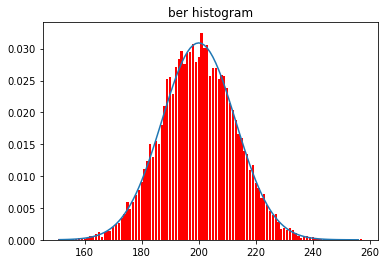

In [ ]:
data = ber_hist(1/6,1200,12000)